## Car Evaluation Database

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). This model evaluates cars into four classifiers(unaccountable, accountable, good, very good)  according to the following attributes(buying, maintenance, doors, persons, luggage, safety).

Importing libraries(numpy, pandas, matplotlib, seaborn) and loading the car data into df variable

In [34]:
# Importing the libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

# Reading Dataset
df = pd.read_csv("car.data",sep=',',header=None, names=['buying','maintenance','doors','persons','luggage','safety','carClass'])


Diplaying the top 5 tuples of car data set using head function

In [35]:
df.head()

,buying,maintenance,doors,persons,luggage,safety,carClass
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Describing the Data Set

In [36]:
# shape is used to get the details of number of features
print(df.shape)

(1728, 7)


The Car Evaluation Dataset contains 1728 tuple values and 7 attributes

In [37]:
# Decribing the data set. 
df.describe()

,buying,maintenance,doors,persons,luggage,safety,carClass
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


From the table we can understand that the dataset has following properties:<br /> 
-> The data set does not have missing values as all the attributes has the same no of tuples(from count). <br /> 
-> The unique value gives the no of distinct values available for each category.<br /> 
-> The top value gives the category values which appears maximum no of times.<br /> 
-> The freq value gives the frequency of the top category value<br /> 


There are some text values in our data set,replacing them by numeric values would be handy in visualising the data and it also increases the computational performance. As we have to compare every text with the available categories, in order to avoid this(higher computation) we have converted the categories into numeric values as the list indices are numerics.<br />
Considering an example of buying feature which has four categories(low, med, high, vhigh). In order to find the frequency of each category it takes four comparisions for each text, so inorder to avoid these comparisions we convert these text to numerics(0, 1, 2, 3). Now we can directly increment the value in the list up on this numeric index

In [38]:
# Converting text values to numeric values

df['buying'] = df.buying.map({'vhigh':3,'high':2,'med':1,'low':0})
df['maintenance'] = df.maintenance.map({'vhigh':3,'high':2,'med':1,'low':0})
df['doors'] = df.doors.map({'2':2,'3':3,'4':4,'5more':5})
df['persons'] = df.persons.map({'2':2,'4':4,'more':5})
df['luggage'] = df.luggage.map({'small':0,'med':1,'big':2})
df['safety'] = df.safety.map({'low':0,'med':1,'high':2})
df['carClass'] = df.carClass.map({'unacc':0,'acc':1,'good':2,'vgood':3})

Displaying the top 5 tuples after mapping to numeric values.

In [39]:
df.head()

,buying,maintenance,doors,persons,luggage,safety,carClass
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


# Exploring the Data Set

Plotting Pie charts for all the six attributes in the data set to get the data distribution.<br />
We use the subplots method of mathplotlib to represent the different graphs in a figure.
Later show method of matplotlib library is used to display the data distribution charts.

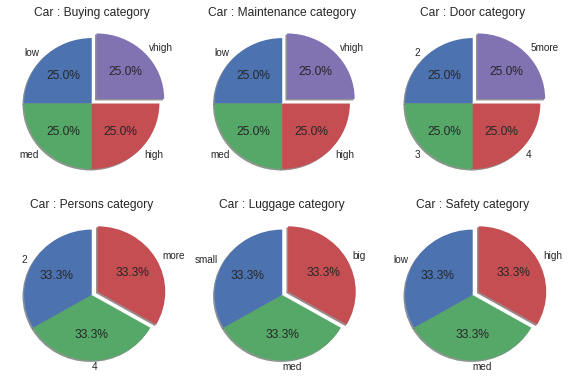

In [40]:

fig,axes = plt.subplots(nrows=2, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

# Ploting Pie chart for 'Buying' feature with its category distribution
list0 = [0,0,0,0]
for i in df['buying']:
    list0[i]= list0[i]+1
# print list0
labels0 = 'low','med','high','vhigh'
explode0 = (0, 0, 0, 0.1)
ax0.pie(list0, explode=explode0, labels=labels0, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax0.set_title('Car : Buying category')

# Ploting Pie chart for 'Maintenace' feature with its category distribution
list1 = [0,0,0,0]
for i in df['maintenance']:
    list1[i]= list1[i]+1
# print list1
labels1 = 'low','med','high','vhigh'
explode1 = (0, 0, 0, 0.1)
ax1.pie(list1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Car : Maintenance category')

# Ploting Pie chart for 'doors' feature with the category distribution
list2 = [0,0,0,0]
for i in df['doors']:
    list2[i-2]= list2[i-2]+1
# print list2
labels2 = '2','3','4','5more'
explode2 = (0, 0, 0, 0.1)
ax2.pie(list2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title('Car : Door category')

# Ploting Pie chart for 'persons' feature with the category distribution
list3 = [0,0,0]
for i in df['persons']:
    if i==2:
        i=0
    elif i==4:
        i=1
    else:
        i=2
    list3[i]= list3[i]+1
# print list3
labels3 = '2','4','more'
explode3 = (0, 0, 0.1)
ax3.pie(list3, explode=explode3, labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.set_title('Car : Persons category')


# Ploting Pie chart for 'luggage' feature with the category distribution
list4 = [0,0,0]
for i in df['luggage']:
    list4[i]= list4[i]+1
# print list4
labels4 = 'small','med','big'
explode4 = (0, 0, 0.1)
ax4.pie(list4, explode=explode4, labels=labels4, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.set_title('Car : Luggage category')

# Ploting Pie chart for 'safety' feature with the category distribution
list5 = [0,0,0]
for i in df['safety']:
    list5[i]= list5[i]+1
# print list5
labels5 = 'low','med','high'
explode5 = (0, 0, 0.1)
ax5.pie(list5, explode=explode5, labels=labels5, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax5.set_title('Car : Safety category')

fig.tight_layout()
plt.show()

From the pie charts we can infer that all the values in each categories of each attribute are equally distributed.

Plotting histogram for car class to know the class distribution

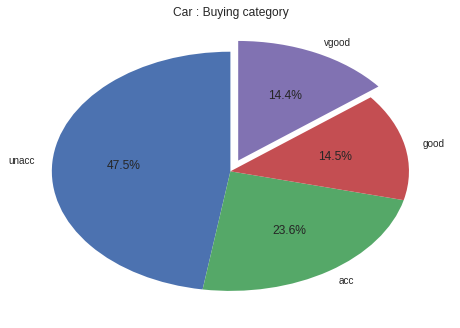

In [41]:

# Ploting Pie chart for 'Buying' feature with its category distribution
list6 = [0,0,0,0]
for i in df['carClass']:
    list0[i]= list0[i]+1
# print list6
labels0 = 'unacc','acc','good','vgood'
explode0 = (0, 0, 0, 0.1)
plt.pie(list0, explode=explode0, labels=labels0, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.title('Car : Buying category')

plt.show()

From the above graph we can observe that there are more number of unccountable cars ie., 62.5% of unccountable cars, 22.7% of accountable cars, 7.5% of good cars and 7.3% of very good cars. This shows us that most of the cars bought come under unaccountable class.

## Pair Plot

Pair plotting between all the attributes in the data set which describes the relation among attributes.

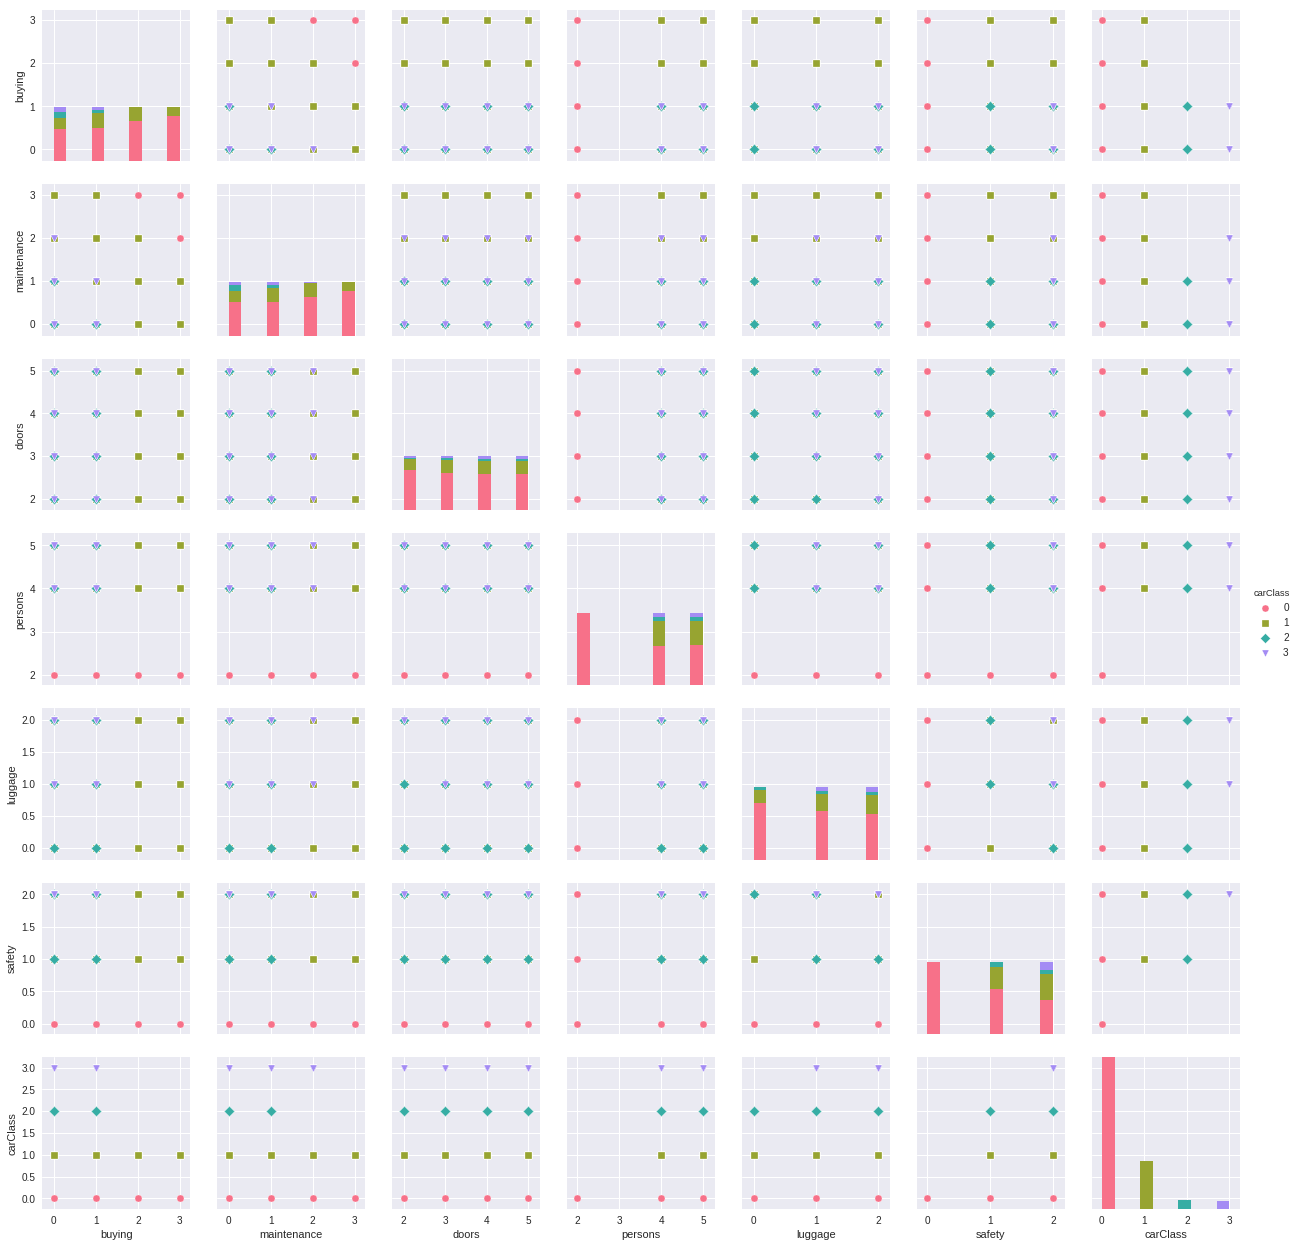

In [42]:
# pairplot method of Seaborn is used to represent the plots for each pair of attributes

sns.pairplot(df, hue='carClass',palette="husl",markers=["o", "s", "D","v"])

-> Circle describes the unaccountable cars category.<br />
-> Square describes the accountbale cars category.<br />
-> Diamond describes the good cars category.<br />
-> Cap describes the very good cars category.<br />


We can observe from the above plots that the cars under very good class(carClass-3) have high safety, optimal maintenance and atleast with medium luggage. The factor doors doesn't imply any effect in car class evaluation.
